In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

In [ ]:
# Anahtarları ayırma ve kaydetme

import csv

with open("insurance.csv", "r") as f:
    reader = csv.reader(f)
    headers = next(reader) # başlıkları al
    writers = {} # her başlık için bir yazar nesnesi tutacak sözlük
    for header in headers: # her başlık için döngü
        writers[header] = csv.writer(open(header + ".csv", "w")) # yazar nesnesini oluştur ve sözlüğe ekle
        writers[header].writerow([header]) # başlığı ilk satır olarak yaz
    for row in reader: # verileri okumak için döngü
        for i in range(len(headers)): # her sütun için döngü
            writers[headers[i]].writerow([row[i]]) # ilgili yazar nesnesine veriyi yaz


In [ ]:
# Anahtarları yüklemek için Class oluşturuldu

import csv
class readers():
  def __init__(self,keys):
    self.key = keys

  def info(self):
    with open(f"{self.key}.csv", "r") as f:
      reader = csv.reader(f)

      liste = [i[0] for i in list(reader)[1:]]
    return liste


In [ ]:
# Anahtarlar

age = readers("age").info()
bmi = readers("bmi").info()
charges = readers("charges").info()
children = readers("children").info()
region = readers("region").info()
sex = readers("sex").info()
smoker = readers("smoker").info()

In [ ]:
import pandas as pd # pandas kütüphanesini içe aktar
import matplotlib.pyplot as plt

class grafik():

  def __init__(self,x = None,y = None,kind = None,x_title = None,y_title = None , labels = None,sizes = None,colors = None,explode = None):
    self.x = x
    self.y = y
    self.kind = kind
    self.x_title = x_title
    self.y_title = y_title

    # for cake
    self.labels = labels
    self.sizes = sizes
    self.colors = colors
    self.explode = explode

  def create(self):
    df = pd.read_csv("insurance.csv") # csv dosyasından veri oku
    df.plot(x=self.x, y=self.y, kind=self.kind) # tarih ve fiyat sütunlarını çizgi grafiği olarak çizdir
    plt.xlabel(self.x_title)
    plt.ylabel(self.y_title)
  def cake(self):
    # Data to plot


    # Plot
    plt.pie(self.sizes, explode=self.explode, labels=self.labels, colors=self.colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()


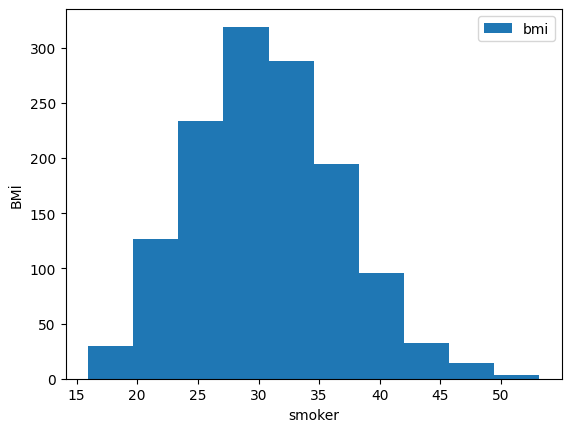

In [ ]:
# @title Bmi (Vücut Kitle İndeksi) dağılımını inceleyin
grafik("smoker","bmi","hist","smoker","BMİ").create()

**30 yaşına kadar Bmi artış göstermekte , 30 yaş sonrasında ise azalmakta**

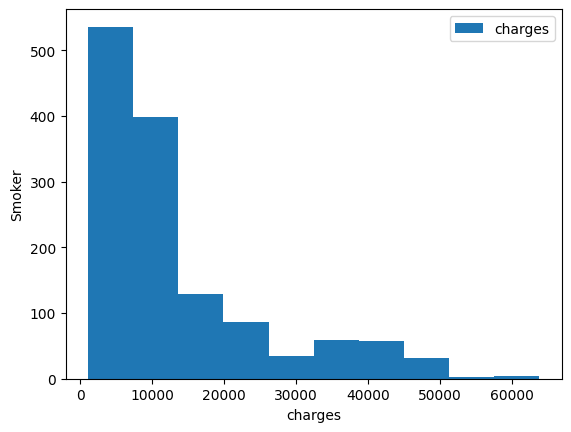

In [ ]:
# @title  "Sigara içen" ve "suçlama" arasındaki ilişkiyi inceleyin
grafik("smoker","charges","hist","charges","Smoker").create()

**Genel olarak sigara içen kişiler daha az suçlanan kişilerden oluşmakta**

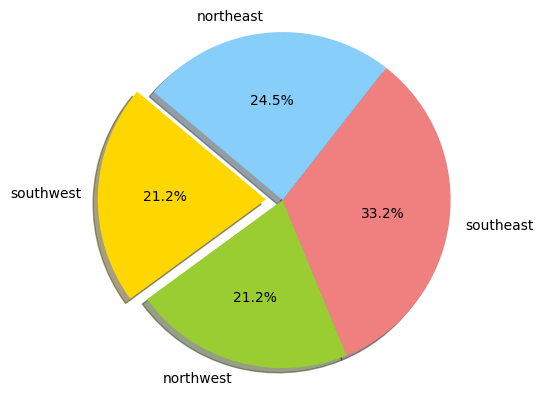

In [ ]:
# @title  "Sigara içen" ve "bölge" arasındaki ilişkiyi inceleyin





import csv

smoker_southwest = 0
smoker_northwest = 0
smoker_southeast = 0
smoker_northeast = 0

# CSV dosyasını aç
with open("insurance.csv", "r") as csv_dosya:
    # Okuyucu nesnesi oluştur
    csv_okuyucu = csv.reader(csv_dosya)
    # Her satırı tek tek al
    for satir in csv_okuyucu:
        # Satırı ekrana yazdır
        if satir[4] == "yes":
          if satir[5] == "southwest":
            smoker_southwest+=1
          elif satir[5] == "northwest":
            smoker_northwest+=1
          elif satir[5] == "southeast":
            smoker_southeast+=1
          elif satir[5] == "northeast":
            smoker_northeast+=1




labels = 'southwest', 'northwest', 'southeast', 'northeast'
sizes = [smoker_southwest, smoker_northwest, smoker_southeast, smoker_northeast]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
grafik(labels=labels ,sizes = sizes, colors=colors , explode=explode).cake()

**Sigara içen sayısı en çok southeast bölgesinde , en az ise southwest bölgesinde**

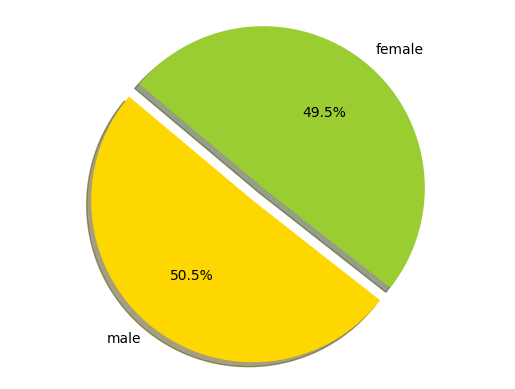

In [ ]:
# @title  "BMİ” ve “cinsiyet” arasındaki ilişkiyi inceleyin





import csv

male = 0
female = 0


# CSV dosyasını aç
with open("insurance.csv", "r") as csv_dosya:
    # Okuyucu nesnesi oluştur
    csv_okuyucu = csv.reader(csv_dosya)
    # Her satırı tek tek al
    for satir in csv_okuyucu:
        # Satırı ekrana yazdır
        if satir[1] == "male":
          male+=1
        elif satir[1] == "female":
          female+=1





labels = 'male', 'female'
sizes = [male, female,]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
grafik(labels=labels ,sizes = sizes, colors=colors , explode=explode).cake()

**Cinsiyete göre bmi miktarı nerdeyse eşittir**

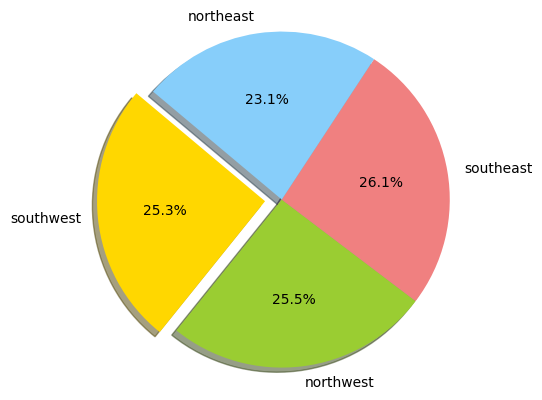

In [ ]:
# @title  En çok çoçuk olan bölgeyi bulun





import csv

smoker_southwest = 0
smoker_northwest = 0
smoker_southeast = 0
smoker_northeast = 0

# CSV dosyasını aç
with open("insurance.csv", "r") as csv_dosya:
    # Okuyucu nesnesi oluştur
    csv_okuyucu = csv.reader(csv_dosya)
    # Her satırı tek tek al
    for satir in csv_okuyucu:
        # Satırı ekrana yazdır

        if satir[5] == "southwest":
          smoker_southwest+= int(satir[3])
        elif satir[5] == "northwest":
          smoker_northwest+=int(satir[3])
        elif satir[5] == "southeast":
          smoker_southeast+=int(satir[3])
        elif satir[5] == "northeast":
            smoker_northeast+=int(satir[3])




labels = 'southwest', 'northwest', 'southeast', 'northeast'
sizes = [smoker_southwest, smoker_northwest, smoker_southeast, smoker_northeast]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
grafik(labels=labels ,sizes = sizes, colors=colors , explode=explode).cake()

**Çoçuk sayısı en çok northwest bölgesinde , en az ise northeast bölgesinde**

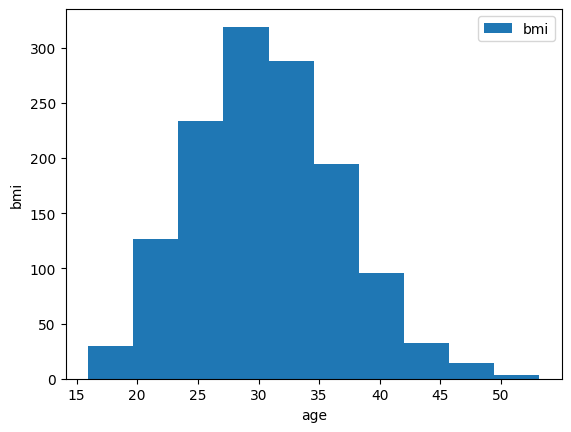

In [ ]:
# @title  “Yaş” ve “bmi” arasındaki ilişkiyi inceleyin
grafik("age","bmi","hist","age","bmi").create()

**30 yaşına kadar Bmi artış göstermekte , 30 yaş sonrasında ise azalmakta**

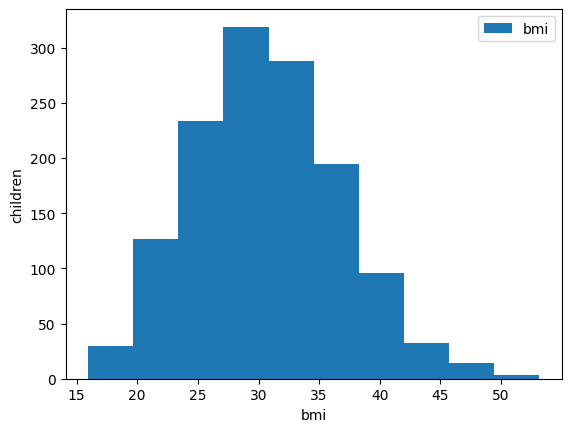

In [ ]:
# @title  “BMI” ve “çocuklar” arasındaki ilişkiyi inceleyin
grafik("children","bmi","hist","bmi","children").create()

<Axes: xlabel='bmi'>

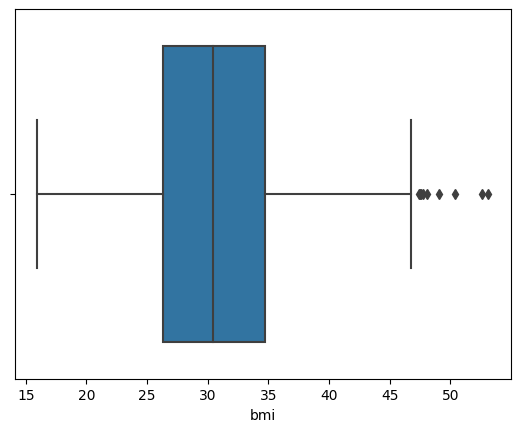

In [ ]:
# @title  "BMI" değişkeninde bir aykırı değer var mı? Gözden geçirin
import seaborn as sns
import pandas as pd


data = pd.read_csv("insurance.csv")
dt = data.copy()
sns.boxplot(x="bmi",data=dt)

**Aykırı değerler bulunmakta**

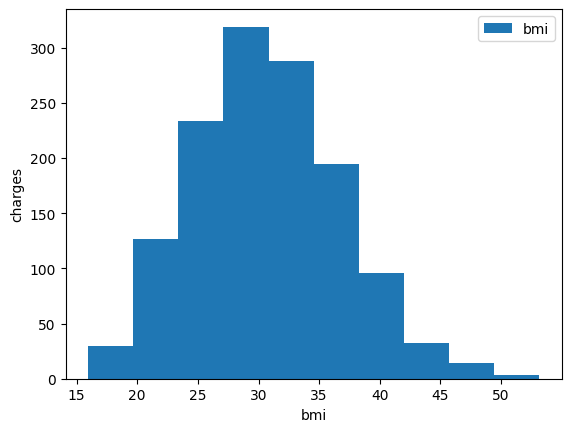

In [ ]:
# @title “BMI” ve “charges” arasındaki ilişkiyi inceleyin
grafik("charges","bmi","hist","bmi","charges").create()

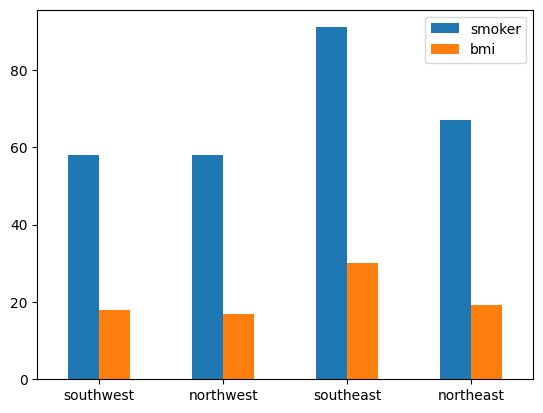

In [ ]:
# @title “bölge”, “sigara içen” ve “bmi” arasındaki ilişkiyi bar grafiği kullanarak inceleyin

import csv

smoker_southwest = 0
smoker_northwest = 0
smoker_southeast = 0
smoker_northeast = 0

southwest_bmi = 0
northwest_bmi = 0
southeast_bmi = 0
northeast_bmi = 0

# CSV dosyasını aç
with open("insurance.csv", "r") as csv_dosya:
    # Okuyucu nesnesi oluştur
    csv_okuyucu = csv.reader(csv_dosya)
    # Her satırı tek tek al
    for satir in csv_okuyucu:
        # Satırı ekrana yazdır
        if satir[4] == "yes":
          if satir[5] == "southwest":
            smoker_southwest+=1
            southwest_bmi+= float(satir[2])
          elif satir[5] == "northwest":
            smoker_northwest+=1
            northwest_bmi+= float(satir[2])
          elif satir[5] == "southeast":
            smoker_southeast+=1
            southeast_bmi+= float(satir[2])
          elif satir[5] == "northeast":
            smoker_northeast+=1
            northeast_bmi+= float(satir[2])



smoker = [smoker_southwest,smoker_northwest,smoker_southeast,smoker_northeast]
bmi = [southwest_bmi/100,northwest_bmi/100,southeast_bmi/100,northeast_bmi/100]
index = ['southwest', 'northwest', 'southeast',
         'northeast']
df = pd.DataFrame({'smoker': smoker,
                   'bmi': bmi}, index=index)
ax = df.plot.bar(rot=0)

EĞİTİM

In [ ]:
# Eğitim

import pandas as pd
import numpy as np
import seaborn as sns


data = pd.read_csv("insurance.csv")
dt = data.copy()





In [ ]:
dt

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
dt.isna() # dolular false olarak gözükür

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
dt.isna().sum()  # None değer sayısı

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
dt.info() # veri tipleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dt[["smoker"]]

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [ ]:
smoke1 = []
for i in dt["smoker"]:
  if i == "yes":
    smoke1.append(1)
  elif i == "no":
    smoke1.append(0)

In [ ]:
sex1 = []
for i in dt["sex"]:
  if i == "male":
    sex1.append(1)
  elif i == "female":
    sex1.append(0)
dt["sex"] = pd.Series(sex1)

In [ ]:
# ['southwest', 'northwest', 'southeast',  'northeast']
region1 = []
for i in dt["region"]:
  if i == "southwest":
    region1.append(1)
  elif i == "northwest":
    region1.append(2)
  elif i == "southeast":
    region1.append(3)
  elif i == "northeast":
    region1.append(4)


dt["region"] = pd.Series(region1)

In [ ]:
dt["smoker"] = pd.Series(smoke1)

In [ ]:
dt["smoker"] = dt["smoker"].astype("category")

In [ ]:
dt["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
dt["smoker"].mean() # catagorik değerlerde çalışmaz

TypeError: ignored

In [ ]:
dt["smoker"].value_counts() # kaç 0 kaç 1 var onu gösterir

0    1064
1     274
Name: smoker, dtype: int64

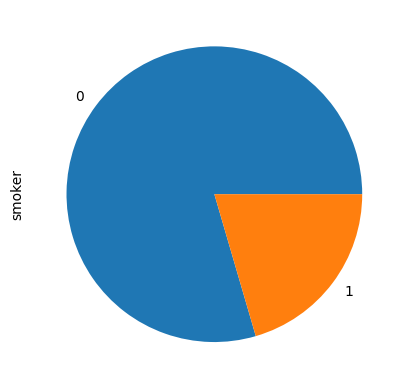

In [ ]:
dt["smoker"].value_counts().plot.pie();

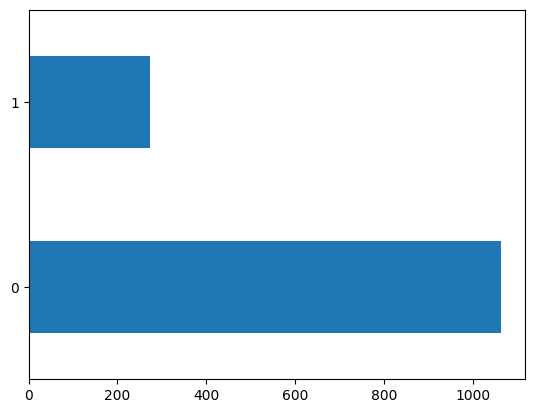

In [ ]:
dt["smoker"].value_counts().plot.barh();

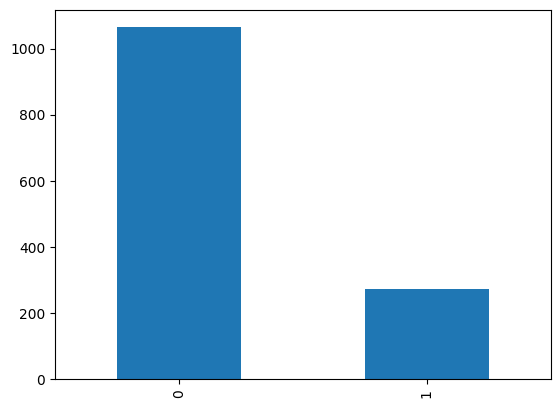

In [ ]:
dt["smoker"].value_counts().plot.bar();

In [ ]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
region,1338.0,2.513453,1.104915,1.0000,2.00000,3.000,3.000000,4.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Eğitim

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

train_df = pd.read_csv('insurance.csv')





X = train_df.drop('smoker', axis=1)
y = train_df['smoker']



categorical_features = ['age', 'sex', 'smoker', 'region']


import seaborn as sns
import matplotlib.pyplot as plt





# Encoding categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()

    train_df[column] = le.fit_transform(train_df[column])

    label_encoders[column] = le



# Encoding the target variable
target_encoder = LabelEncoder()
train_df['smoker'] = target_encoder.fit_transform(train_df['smoker'])


#Splitting data into features and target
X = train_df.drop('smoker', axis=1)
y = train_df['smoker']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Splitting data into training and testing sets



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForest Classifier
random_state = 52
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.1, random_state=random_state) #
clf = RandomForestClassifier(random_state=random_state, n_estimators=100,max_depth = 10) # random_state=42, n_estimators=100

from sklearn.model_selection import GridSearchCV


#cv.fit(X_train,y_train)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)


print(accuracy) # classification_rep





0.9776119402985075
